In [28]:
#Libraries import
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt

In [29]:
# Data import
tickers = ["SPY","QQQ"]
startDate = "2024-01-01"
endDate = dt.datetime.now()
data = yf.download(tickers, startDate, endDate)

[*********************100%***********************]  2 of 2 completed


In [30]:
#Filtering the data
VaRdata = data ['Close']

In [31]:
#Returns calc
returns = np.log(VaRdata/VaRdata.shift(1))
returns = returns.dropna()
returns

Ticker,QQQ,SPY
Date,,
2024-01-03,-0.010638,-0.008200
2024-01-04,-0.005160,-0.003226
2024-01-05,0.001185,0.001369
2024-01-08,0.020457,0.014175
2024-01-09,0.001974,-0.001518
...,...,...
2025-02-13,0.014283,0.010502
2025-02-14,0.004190,-0.000049
2025-02-18,0.002264,0.002932


In [32]:
#Portfolio info
weights = [0.5, 0.5]
portfolio_value = 500000
portfolio_return = (returns * weights).sum(axis=1)

In [33]:
#VaR
days = 10
VaRconfidence_level = 0.99
VaRconfpct = VaRconfidence_level*100

timeReturns = portfolio_return.rolling(days).sum()
timeReturns.dropna()
timeReturns = timeReturns.dropna()
VaR = -np.percentile(timeReturns, 100 - VaRconfidence_level * 100) * portfolio_value
print("Убыток за период", days,"д. не превысит", VaR, 'единиц валюты в', VaRconfpct,"% случаев.")

Убыток за период 10 д. не превысит 29883.35101524772 единиц валюты в 99.0 % случаев.


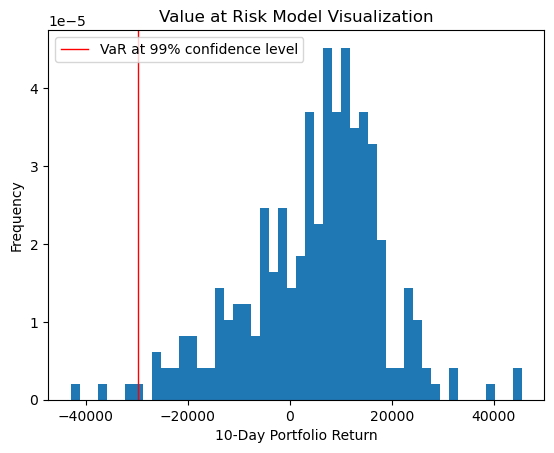

In [34]:
plotreturns = timeReturns * portfolio_value
plt.hist(plotreturns.dropna(), bins = 50, density = True)
plt.xlabel(f'{days}-Day Portfolio Return')
plt.ylabel('Frequency')
plt.title(f'Value at Risk Model Visualization')
plt.axvline(-VaR, color='r', linestyle='solid', linewidth=1, label = f'VaR at {VaRconfidence_level:.0%} confidence level')
plt.legend()
plt.show()